In [9]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#importing our cancer dataset
dataset = pd.read_csv("https://sachinaws13.s3.us-west-2.amazonaws.com/diabetes.csv")
X = dataset.iloc[:, 1:8].values
Y = dataset.iloc[:, 8].values

In [10]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
print("Diabetes data set dimensions : {}".format(dataset.shape))

Diabetes data set dimensions : (768, 9)


In [40]:
dataset.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

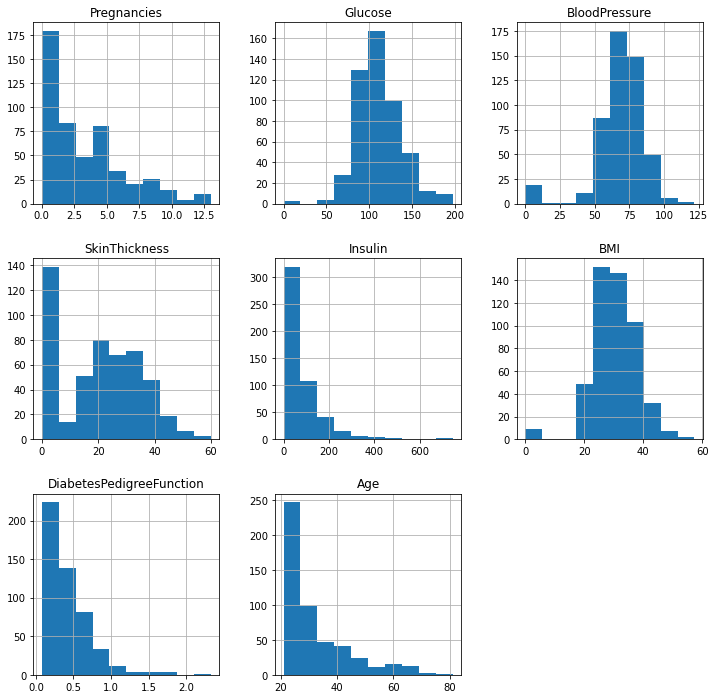

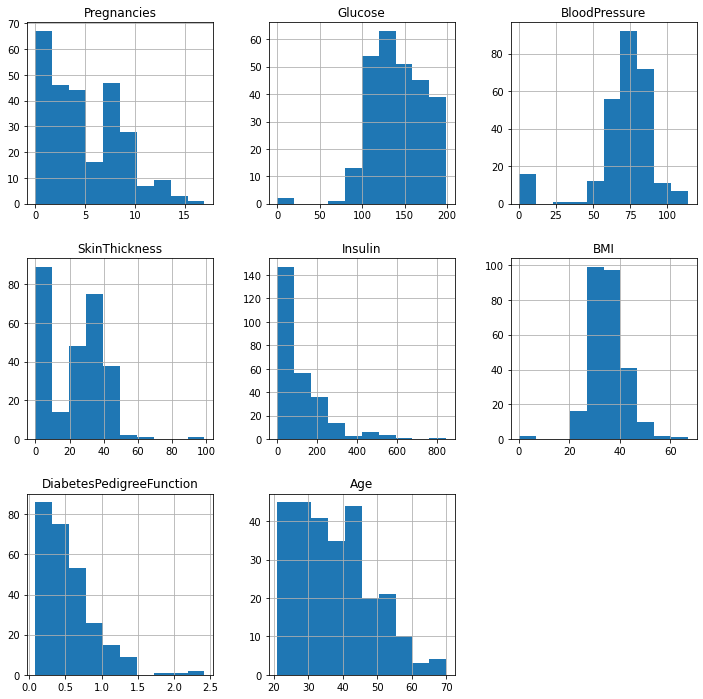

In [41]:
#Visualization of data
dataset.groupby('Outcome').hist(figsize=(12, 12))

In [13]:
dataset.isnull().sum()
dataset.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [26]:
#Encoding categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

In [27]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [28]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [49]:
#Using Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression
classifierLR = LogisticRegression(random_state = 0)
classifierLR.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [55]:
from sklearn.metrics import accuracy_score, classification_report
score = classifierLR.score(X_test, Y_test)
print('Accuracy score ',score)
print('\n')
print('Accuracy score of the Logistic Regression Classifier {0:.2f}%'
      .format(accuracy_score(Y_test, classifierLR.predict(X_test))*100.))
print('\n')

Accuracy score  0.7864583333333334


Accuracy score of the Logistic Regression Classifier 78.65%




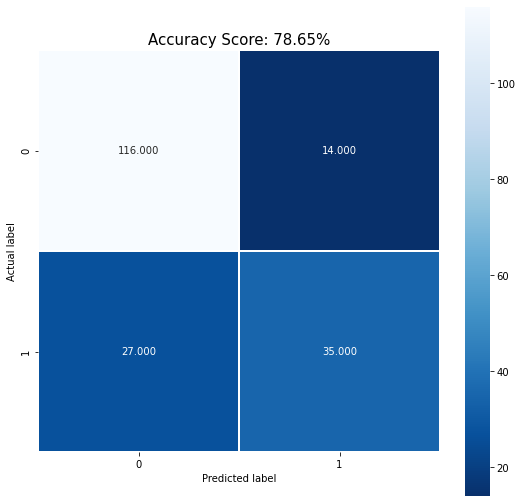

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
confusion_matrix = metrics.confusion_matrix(Y_test, classifierLR.predict(X_test))
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0:.2f}%'.format(accuracy_score(Y_test, classifierLR.predict(X_test))*100.)
plt.title(all_sample_title, size = 15);

In [60]:
#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
classifierKN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifierKN.fit(X_train, Y_train)

KNeighborsClassifier()

In [67]:
score = classifierKN.score(X_test, Y_test)
print('Accuracy score ',score)
print('\n')
print('Accuracy score of the Nearest Neighbor Classifier {0:.2f}%'
      .format(accuracy_score(Y_test, classifierKN.predict(X_test))*100.))
print('\n')

Accuracy score  0.796875


Accuracy score of the Nearest Neighbor Classifier 79.69%




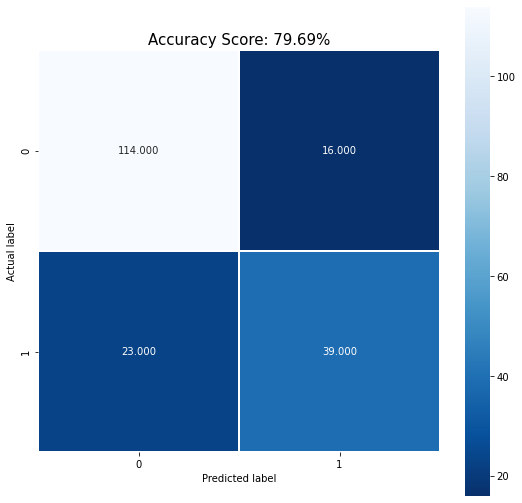

In [80]:
confusion_matrix = metrics.confusion_matrix(Y_test, classifierKN.predict(X_test))
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0:.2f}%'.format(accuracy_score(Y_test, classifierKN.predict(X_test))*100.)
plt.title(all_sample_title, size = 15);

In [64]:
#Using SVC method of svm class to use Support Vector Machine Algorithm
from sklearn.svm import SVC
classifierSVM_linear = SVC(kernel = 'linear', random_state = 0)
classifierSVM_linear.fit(X_train, Y_train)

SVC(kernel='linear', random_state=0)

In [66]:
score = classifierKN.score(X_test, Y_test)
print('Accuracy score ',score)
print('\n')
print('Accuracy score of the Support Vector Machine Classifier Using Kernel as Linear {0:.2f}%'
      .format(accuracy_score(Y_test, classifierSVM_linear.predict(X_test))*100.))
print('\n')

Accuracy score  0.796875


Accuracy score of the Support Vector Machine Classifier Using Kernel as Linear 79.17%




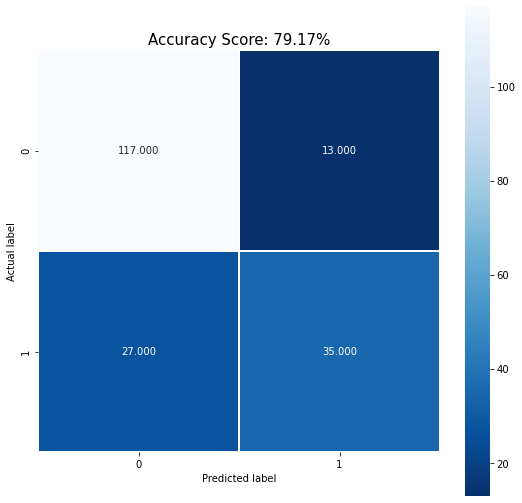

In [81]:
confusion_matrix = metrics.confusion_matrix(Y_test, classifierSVM_linear.predict(X_test))
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0:.2f}%'.format(accuracy_score(Y_test, classifierSVM_linear.predict(X_test))*100.)
plt.title(all_sample_title, size = 15);

In [69]:
#Using SVC method of svm class to use Kernel SVM Algorithm
from sklearn.svm import SVC
classifierSVM_rbf = SVC(kernel = 'rbf', random_state = 0)
classifierSVM_rbf.fit(X_train, Y_train)

SVC(random_state=0)

In [70]:
score = classifierSVM_rbf.score(X_test, Y_test)
print('Accuracy score ',score)
print('\n')
print('Accuracy score of the Support Vector Machine Classifier Using Kernel as RBF {0:.2f}%'
      .format(accuracy_score(Y_test, classifierSVM_rbf.predict(X_test))*100.))
print('\n')

Accuracy score  0.7760416666666666


Accuracy score of the Support Vector Machine Classifier Using Kernel as RBF 77.60%




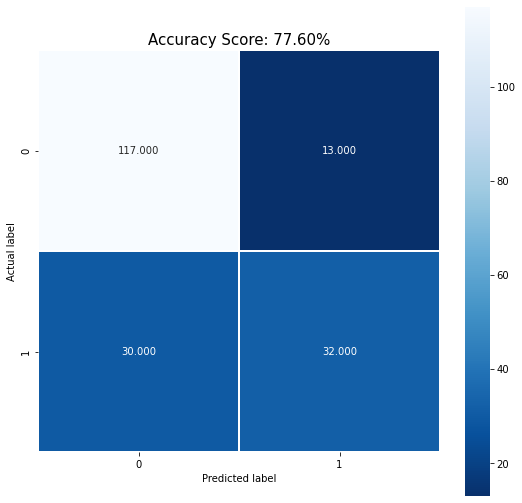

In [77]:
confusion_matrix = metrics.confusion_matrix(Y_test, classifierSVM_rbf.predict(X_test))
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0:.2f}%'.format(accuracy_score(Y_test, classifierSVM_rbf.predict(X_test))*100.)
plt.title(all_sample_title, size = 15);

In [72]:
#Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
classifierGaussianNB = GaussianNB()
classifierGaussianNB.fit(X_train, Y_train)

GaussianNB()

In [74]:
score = classifierGaussianNB.score(X_test, Y_test)
print('Accuracy score ',score)
print('\n')
print('Accuracy score of the Support Vector Machine Classifier Using Kernel as RBF {0:.2f}%'
      .format(accuracy_score(Y_test, classifierGaussianNB.predict(X_test))*100.))
print('\n')

Accuracy score  0.7447916666666666


Accuracy score of the Support Vector Machine Classifier Using Kernel as RBF 74.48%




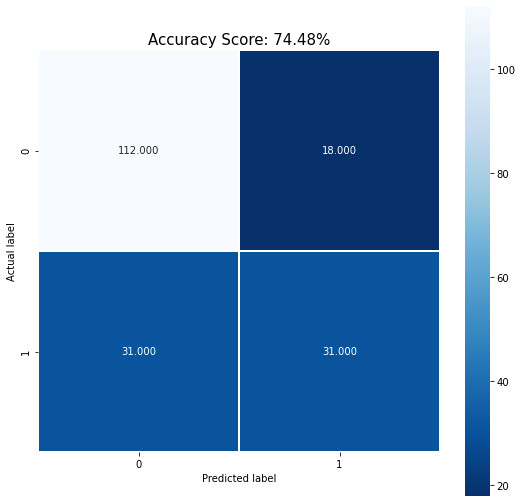

In [82]:
confusion_matrix = metrics.confusion_matrix(Y_test, classifierGaussianNB.predict(X_test))
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0:.2f}%'.format(accuracy_score(Y_test, classifierGaussianNB.predict(X_test))*100.)
plt.title(all_sample_title, size = 15);

In [83]:
#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
classifierDT = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifierDT.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [86]:
score = classifierDT.score(X_test, Y_test)
print('Accuracy score ',score)
print('\n')
print('Accuracy score of the Decision Tree Classifier {0:.2f}%'
      .format(accuracy_score(Y_test, classifierDT.predict(X_test))*100.))
print('\n')

Accuracy score  0.7760416666666666


Accuracy score of the Decision Tree Classifier 77.60%




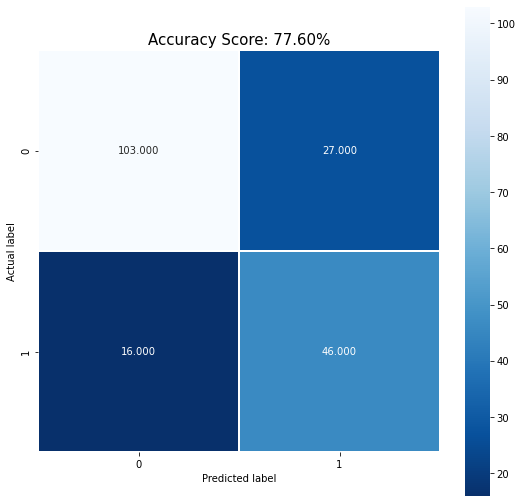

In [87]:
confusion_matrix = metrics.confusion_matrix(Y_test, classifierDT.predict(X_test))
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0:.2f}%'.format(accuracy_score(Y_test, classifierDT.predict(X_test))*100.)
plt.title(all_sample_title, size = 15);

In [89]:
#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
from sklearn.ensemble import RandomForestClassifier
classifierRF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifierRF.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [90]:
score = classifierRF.score(X_test, Y_test)
print('Accuracy score ',score)
print('\n')
print('Accuracy score of the Random Forest Classifier {0:.2f}%'
      .format(accuracy_score(Y_test, classifierRF.predict(X_test))*100.))
print('\n')

Accuracy score  0.7708333333333334


Accuracy score of the Random Forest Classifier 77.08%




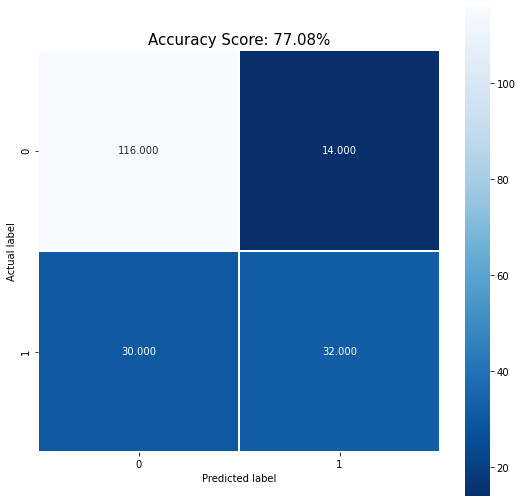

In [91]:
confusion_matrix = metrics.confusion_matrix(Y_test, classifierRF.predict(X_test))
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0:.2f}%'.format(accuracy_score(Y_test, classifierRF.predict(X_test))*100.)
plt.title(all_sample_title, size = 15);